In [23]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from gensim.models import FastText
from sklearn.decomposition import PCA

%matplotlib notebook

In [2]:
df = pd.read_excel('Participants_Data_News_category/Data_Train.xlsx', sheet_name=None)['Sheet1']
df1 = pd.read_excel('Participants_Data_News_category/Data_Test.xlsx', sheet_name=None)['Sheet1']

In [3]:
Counter(list(df.SECTION))

Counter({3: 1246, 0: 1686, 1: 2772, 2: 1924})

In [4]:
df = df.append(df1).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [5]:
len(df)

10376

In [6]:
df.columns

Index(['SECTION', 'STORY'], dtype='object')

In [7]:
stories = list(df.STORY)

In [8]:
stories[0]

'But the most painful was the huge reversal in fee income, unheard of among private sector lenders. Essentially, it means that Yes Bank took it for granted that fees on structured loan deals will be paid and accounted for upfront on its books. As borrowers turned defaulters, the fees tied to these loan deals fell off the cracks. Gill has now vowed to shift to a safer accounting practice of amortizing fee income rather than booking these upfront.\n\n\nGill’s move to mend past ways means that there will be no nasty surprises in the future. This is good news considering that investors love a clean image and loathe uncertainties.\n\n\nBut there is no gain without pain and the promise of a strong and stable balance sheet comes with some sacrifices as well. Investors will have to give up the hopes of phenomenal growth, a promise made by Kapoor.'

In [9]:
tokenized_stories = [nltk.word_tokenize(story.lower()) for story in tqdm_notebook(stories)]

In [10]:
len(tokenized_stories)

10376

In [11]:
sentence_lens = []
for story in tokenized_stories:
    sentence_lens.append(len(story))

<IPython.core.display.Javascript object>


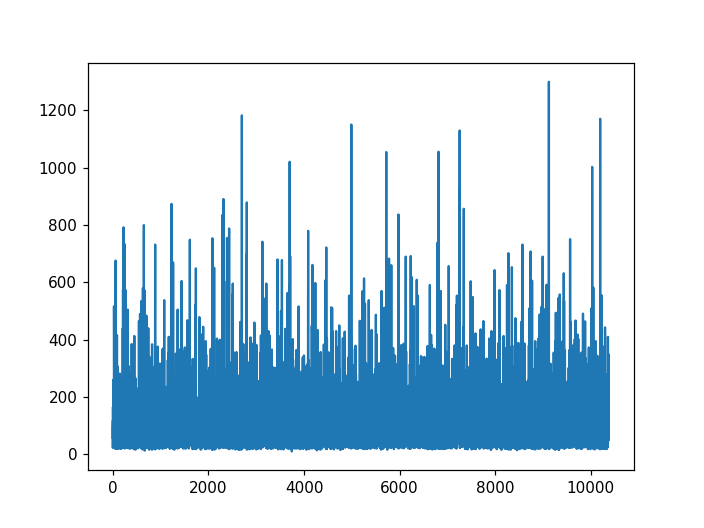

In [24]:
plt.plot(sentence_lens)

In [13]:
np.average(sentence_lens), max(sentence_lens), min(sentence_lens)

(122.38878180416346, 1300, 10)

In [14]:
embedding_model = FastText(sentences=tokenized_stories, 
                        min_count=1, window=3, size=256,
                        iter=10, sg=1)

In [15]:
len(embedding_model.wv.vocab)

46988

In [16]:
X = embedding_model[embedding_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


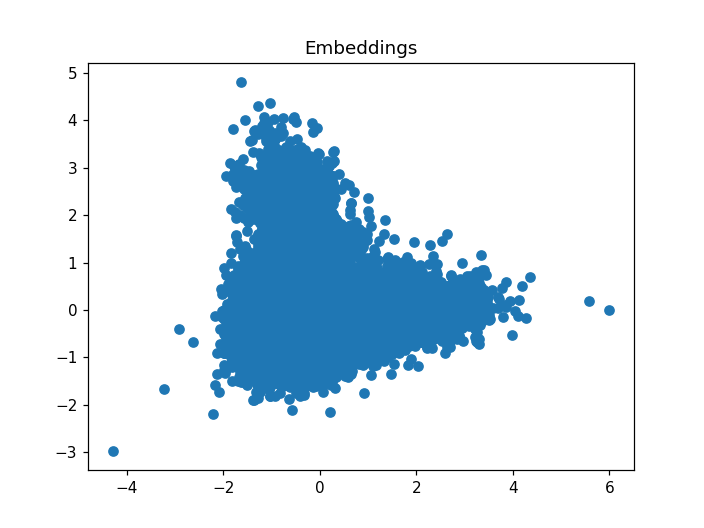

In [25]:
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Embeddings')
plt.show()

In [18]:
words = list(embedding_model.wv.vocab.keys())

<IPython.core.display.Javascript object>


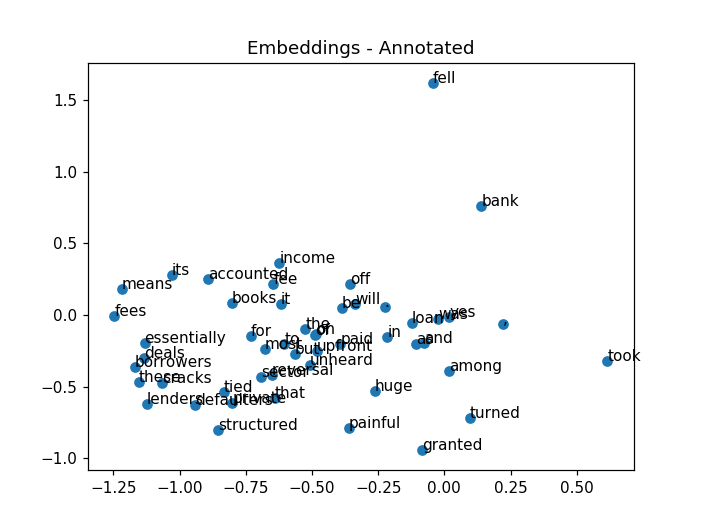

In [26]:
i = 50

fig, ax = plt.subplots()
ax.set_title('Embeddings - Annotated')
ax.scatter(result[:i, 0], result[:i, 1])

for j, txt in enumerate(list(words)[:i]):
    ax.annotate(txt, result[j])

In [20]:
embedding_model.save('fasttext-embedding/skipgram-256-news-classification.fasttext')

In [28]:
embedding_model.wv.similarity('lender', 'borrower')

0.6689526